In [770]:
from tvDatafeed import TvDatafeed,Interval
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, MaxPooling2D, LSTM, Dense, Flatten, TimeDistributed,RepeatVector,Dropout
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam

In [771]:
tv = TvDatafeed()
df = tv.get_hist(symbol='NIFTY',exchange='NSE',interval=Interval.in_daily,n_bars=7000)

In [772]:
df

,symbol,open,high,low,close,volume
datetime,,,,,,
1995-01-06 09:15:00,NSE:NIFTY,1130.3600,1130.3600,1130.3600,1130.3600,0.0
1995-01-09 09:15:00,NSE:NIFTY,1112.1000,1112.1000,1112.1000,1112.1000,0.0
1995-01-10 09:15:00,NSE:NIFTY,1079.2000,1079.2000,1079.2000,1079.2000,0.0
1995-01-11 09:15:00,NSE:NIFTY,1067.5800,1067.5800,1067.5800,1067.5800,0.0
1995-01-12 09:15:00,NSE:NIFTY,1066.1899,1066.1899,1066.1899,1066.1899,0.0
...,...,...,...,...,...,...
2023-04-24 09:15:00,NSE:NIFTY,17707.5510,17754.5000,17612.5000,17743.4000,255740393.0
2023-04-25 09:15:00,NSE:NIFTY,17761.5510,17807.4490,17716.8500,17769.2500,297445999.0
2023-04-26 09:15:00,NSE:NIFTY,17767.3010,17827.7500,17711.1990,17813.6000,233008677.0


In [773]:
df['open-1']=df['open'].shift(1)
df['open-2']=df['open'].shift(2)
df['open-3']=df['open'].shift(3)
df['open-4']=df['open'].shift(4)
df['open-5']=df['open'].shift(5)
df['open-6']=df['open'].shift(6)
df['open-7']=df['open'].shift(7)
df['open-8']=df['open'].shift(8)
df['open-9']=df['open'].shift(9)
df['open-10']=df['open'].shift(10)

In [774]:
df=df.drop(['close','high','volume','low','symbol'], axis=1)

In [775]:
df=df.dropna()

In [776]:
df

,open,open-1,open-2,open-3,open-4,open-5,open-6,open-7,open-8,open-9,open-10
datetime,,,,,,,,,,,
1995-01-20 09:15:00,1075.590,1091.5699,1091.2100,1084.0800,1087.8000,1074.4301,1066.1899,1067.5800,1079.2000,1112.1000,1130.3600
1995-01-23 09:15:00,1041.780,1075.5900,1091.5699,1091.2100,1084.0800,1087.8000,1074.4301,1066.1899,1067.5800,1079.2000,1112.1000
1995-01-24 09:15:00,1019.200,1041.7800,1075.5900,1091.5699,1091.2100,1084.0800,1087.8000,1074.4301,1066.1899,1067.5800,1079.2000
1995-01-25 09:15:00,1030.010,1019.2000,1041.7800,1075.5900,1091.5699,1091.2100,1084.0800,1087.8000,1074.4301,1066.1899,1067.5800
1995-01-27 09:15:00,1043.590,1030.0100,1019.2000,1041.7800,1075.5900,1091.5699,1091.2100,1084.0800,1087.8000,1074.4301,1066.1899
...,...,...,...,...,...,...,...,...,...,...,...
2023-04-24 09:15:00,17707.551,17639.7500,17638.6000,17653.3500,17766.6000,17863.0000,17807.3010,17759.5510,17704.8010,17634.9000,17533.8500
2023-04-25 09:15:00,17761.551,17707.5510,17639.7500,17638.6000,17653.3500,17766.6000,17863.0000,17807.3010,17759.5510,17704.8010,17634.9000
2023-04-26 09:15:00,17767.301,17761.5510,17707.5510,17639.7500,17638.6000,17653.3500,17766.6000,17863.0000,17807.3010,17759.5510,17704.8010


<Axes: xlabel='datetime'>

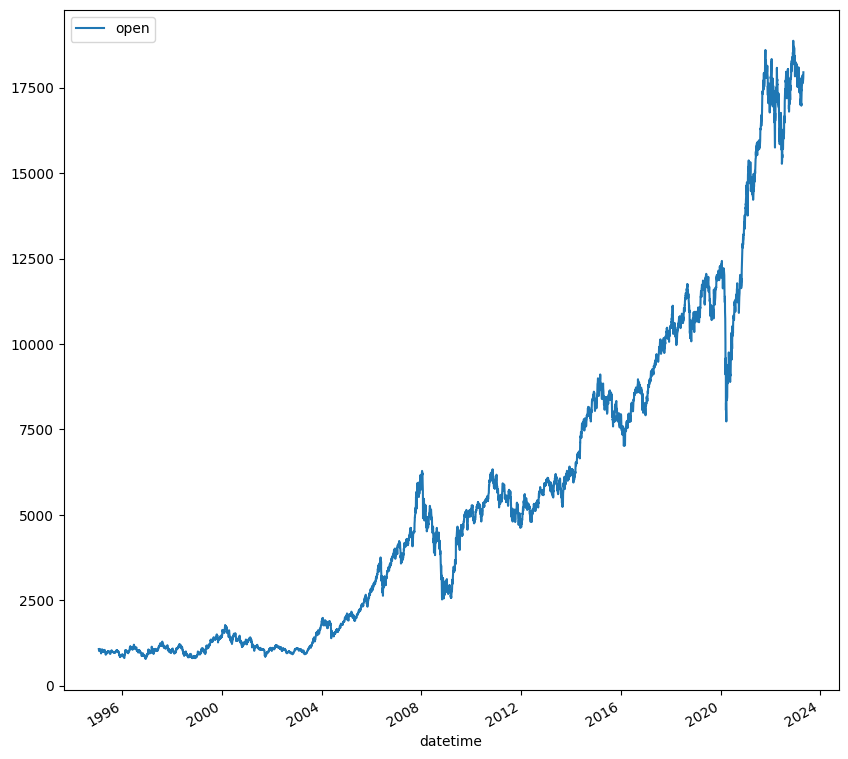

In [777]:
df.plot(y=['open'],kind="line", figsize=(10, 10))

In [778]:
y=df['open']
y=y.to_numpy().reshape(y.shape[0],1)
y.shape

(6990, 1)

In [779]:
X=df.drop(['open'],axis=1)
X=X.to_numpy()

In [780]:
X

array([[ 1091.5699,  1091.21  ,  1084.08  , ...,  1079.2   ,  1112.1   ,
         1130.36  ],
       [ 1075.59  ,  1091.5699,  1091.21  , ...,  1067.58  ,  1079.2   ,
         1112.1   ],
       [ 1041.78  ,  1075.59  ,  1091.5699, ...,  1066.1899,  1067.58  ,
         1079.2   ],
       ...,
       [17761.551 , 17707.551 , 17639.75  , ..., 17807.301 , 17759.551 ,
        17704.801 ],
       [17767.301 , 17761.551 , 17707.551 , ..., 17863.    , 17807.301 ,
        17759.551 ],
       [17813.1   , 17767.301 , 17761.551 , ..., 17766.6   , 17863.    ,
        17807.301 ]])

In [781]:
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size = 0.3, random_state=2)

In [782]:
Y_train

array([[  838.84998],
       [17185.6    ],
       [11502.1    ],
       ...,
       [10596.2    ],
       [17338.75   ],
       [ 2128.3    ]])

In [783]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
Y_train = scaler.fit_transform(Y_train)
Y_val = scaler.transform(Y_val)




In [784]:
model = Sequential()

model.add(ConvLSTM2D(filters=64, kernel_size=(1,3), activation='relu', input_shape=(2,1,5,1)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Flatten())

model.add(RepeatVector(5))

model.add(LSTM(200, return_sequences=True))

model.add(TimeDistributed(Dense(100)))

model.add(TimeDistributed(Dense(1)))

# model.add(Dense(5, activation='relu'))
# model.add(Dense(1, activation='linear'))

In [785]:
model.summary()


Model: "sequential_133"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d_95 (ConvLSTM2D)  (None, 1, 3, 64)         50176     
                                                                 
 batch_normalization_27 (Bat  (None, 1, 3, 64)         256       
 chNormalization)                                                
                                                                 
 flatten_75 (Flatten)        (None, 192)               0         
                                                                 
 repeat_vector_47 (RepeatVec  (None, 5, 192)           0         
 tor)                                                            
                                                                 
 lstm_38 (LSTM)              (None, 5, 200)            314400    
                                                                 
 time_distributed_71 (TimeDi  (None, 5, 100)        

In [786]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')
model.fit(X_train.reshape(X_train.shape[0],2,1,5,1), Y_train, epochs=50, batch_size=32)

Epoch 1/50
153/153 [==============================] - 7s 14ms/step - loss: 0.0092
Epoch 2/50
153/153 [==============================] - 2s 14ms/step - loss: 0.0022
Epoch 3/50
153/153 [==============================] - 2s 14ms/step - loss: 0.0018
Epoch 4/50
153/153 [==============================] - 2s 14ms/step - loss: 0.0012
Epoch 5/50
153/153 [==============================] - 2s 14ms/step - loss: 4.7532e-04
Epoch 6/50
153/153 [==============================] - 2s 15ms/step - loss: 2.8840e-04
Epoch 7/50
153/153 [==============================] - 2s 14ms/step - loss: 1.7553e-04
Epoch 8/50
153/153 [==============================] - 2s 14ms/step - loss: 1.3450e-04
Epoch 9/50
153/153 [==============================] - 2s 14ms/step - loss: 1.0066e-04
Epoch 10/50
153/153 [==============================] - 2s 14ms/step - loss: 7.1901e-05
Epoch 11/50
153/153 [==============================] - 2s 16ms/step - loss: 8.0790e-05
Epoch 12/50
153/153 [==============================] - 3s 17ms/step 

In [787]:
predictions = model.predict(X_val.reshape(X_val.shape[0],2,1,5,1))


66/66 [==============================] - 1s 4ms/step


In [788]:
rmse = np.sqrt(np.mean((predictions[:,1] - Y_val)**2))
print('Mean RMSE:', rmse)

Mean RMSE: 0.0067302506077482355
